Liam sobol 206092397
Raphael stanislas 332264498

In [122]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')
data = pd.read_csv('spam_ham_dataset.csv')
data['text'] = data['text'].map(lambda x: x.lstrip('Subject:'))
xLower = data["text"].map(lambda x: x.lower())
data.fillna(-99,inplace=True)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liam1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vectorize wi

In [123]:
from nltk.corpus import stopwords
import numpy as np
from sortedcontainers import SortedSet
import re

from nltk.tokenize import word_tokenize

data['tokenized_text'] = data['text'].apply(word_tokenize) 


In [124]:

data["word_count"] =data.tokenized_text.map(lambda x: len(set(str(x).split())))
print(data["word_count"])

0        57
1        19
2       227
3        45
4        53
       ... 
5166     57
5167    113
5168     53
5169     62
5170    107
Name: word_count, Length: 5171, dtype: int64


EDA Of the text column

In [125]:
spam = data[data.label_num == 1]['word_count']
ham = data[data.label_num == 0]['word_count']
print('ham info')
print(ham.describe())

print('--------------')
print('spam info')
print(spam.describe())

ham info
count    3672.000000
mean       90.558279
std        83.618133
min         1.000000
25%        35.000000
50%        68.000000
75%       121.000000
max      1647.000000
Name: word_count, dtype: float64
--------------
spam info
count    1499.000000
mean      122.619746
std       132.635112
min         1.000000
25%        42.000000
50%        80.000000
75%       147.000000
max      1328.000000
Name: word_count, dtype: float64


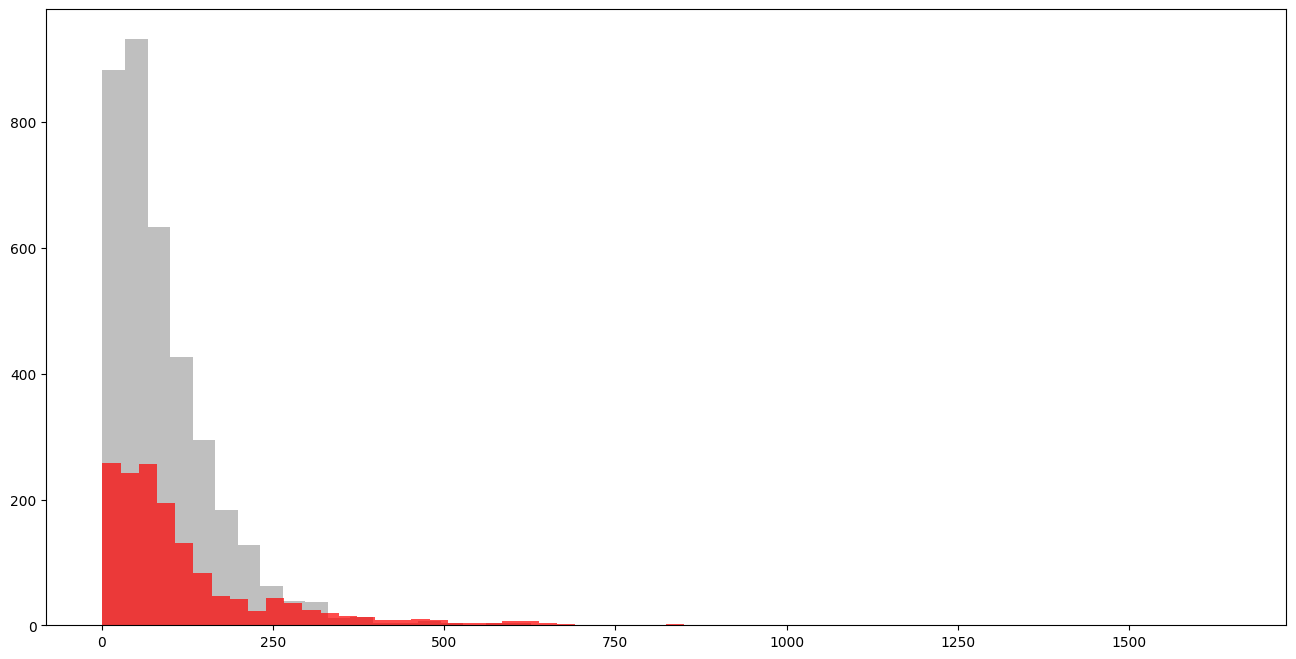

In [126]:


def plot_target_based_features(feature):
    x1 = data[data.label_num== 1][feature]
    x2 = data[data.label_num == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)
    return _

_ = plot_target_based_features("word_count")

CountVectorize function in order to build a table that shows the number of occurnace of each ngram

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

CountVec = CountVectorizer(ngram_range=(1,1),
                           stop_words='english')

#transform
Count_data = CountVec.fit_transform(data.text.tolist())
 
#create dataframe
X=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
print(X)
                   

      00  000  0000  000000  000000000002858  000000000049773  000080  000099  \
0      1    0     0       0                0                0       0       0   
1      0    0     0       0                0                0       0       0   
2      0    0     0       0                0                0       0       0   
3      0    0     0       0                0                0       0       0   
4      0    0     0       0                0                0       0       0   
...   ..  ...   ...     ...              ...              ...     ...     ...   
5166   0    0     0       0                0                0       0       0   
5167   0    4     0       0                0                0       0       0   
5168   0    0     0       0                0                0       0       0   
5169   0    0     0       0                0                0       0       0   
5170   0    0     0       0                0                0       0       0   

      0001  00018  ...  zyn

In [128]:
from sklearn.model_selection import train_test_split
bow_benchmarks = []
y=data.label_num
X_train, X_test,y_train,y_test = train_test_split( X, y, test_size=0.2, random_state=123)



In [129]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, random_state=0)



Benchmark function to summarize all evaluation scores and returns list

In [130]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def benchmark(classifier,vec):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)

    clf_descr = classifier.__class__.__name__ + ' ' + vec
    stats = [clf_descr,a_score,p_score,r_score,f_score]
    return stats

In [131]:

bow_rf_results = benchmark(RF_classifier,'BOW')


In [132]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression(C=4, max_iter=800)
bow_LR_results = benchmark(LR_classifier,'BOW')


In [133]:
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english')

tf_idf_data = tf_idf_vec.fit_transform(data.text.tolist())

X=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())

In [134]:
tf_idf_benchmarks = []
X_train, X_test,y_train,y_test = train_test_split( X, y, test_size=0.2, random_state=123)

tf_idf_RF_results = benchmark(RF_classifier,'tf-idf')



In [135]:
tf_idf_LR_results = benchmark(LR_classifier,'tf-idf')


In [136]:

lists = [bow_rf_results,bow_LR_results,tf_idf_RF_results,tf_idf_LR_results]
results = pd.DataFrame(lists,columns=['Model Name','Accuracy','Precision','Recall','f1'])
print(results)

                      Model Name  Accuracy  Precision    Recall        f1
0     RandomForestClassifier BOW  0.981643   0.952862  0.982639  0.967521
1         LogisticRegression BOW  0.981643   0.959044  0.975694  0.967298
2  RandomForestClassifier tf-idf  0.977778   0.937294  0.986111  0.961083
3      LogisticRegression tf-idf  0.988406   0.975862  0.982639  0.979239


In [137]:
print('The best model is the one using Logistic Regression Model and the "term frequency–inverse document frequency" with accuracy score of 98.88%')
print('The reason for that might be That there is a small use of n-grams and stop words in the text field at the spam_ham_dataset')

The best model is the one using Logistic Regression Model and the "term frequency–inverse document frequency" with accuracy score of 98.88%
The reason for that might be That there is a small use of n-grams and stop words in the text field at the spam_ham_dataset
